In [1]:
#importating libraries

import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas import DatetimeIndex, Series, to_datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold

### 1) Loading the Data

In [2]:
sf= pd.read_csv('../Problem-Sets/data/San Francisco Crime by Neighborhood and Tract.csv')
sf.head()


,neighborhood,Month_Year,number_crimes,tractce10,VC03,VC04,VC05,VC06,VC07,VC08,...,VC206,VC207,VC208,VC209,VC210,VC211,VC212,VC216,VC217,VC218
0,North Beach,01/2003,168,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
1,North Beach,01/2004,162,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
2,North Beach,01/2005,174,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
3,North Beach,01/2006,185,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
4,North Beach,01/2007,153,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN


In [3]:
key = pd.read_csv('../Problem-Sets/data/San Francisco Crime by Neighborhood Feature Key.csv')
key

,Feature,Description
0,VC03,Total households
1,VC04,Total households - Family households (families)
2,VC05,Total households - Family households (families...
3,VC06,Total households - Family households (families...
4,VC07,Total households - Family households (families...
...,...,...
147,VC211,ANCESTRY - Total population - Welsh
148,VC212,ANCESTRY - Total population - West Indian (exc...
149,VC216,COMPUTERS AND INTERNET USE - Total households
150,VC217,COMPUTERS AND INTERNET USE - Total households ...


### 2) Prepare the Data to Fit Model(s)

### 2.1 Is this a supervised or unsupervised learning problem?

This is a supervised learning problem. Here, we want to predict the the number of crimes per neighborhood based on a label(s)/features that we pass into our machine learning algorithm. 

### 2.2 Clean and Manipulate the date so that you have information about the amount of crime per neighborhood per month from 2003-2017?

In [4]:
sf['Month_Year'] = pd.to_datetime(sf['Month_Year'])
sf

,neighborhood,Month_Year,number_crimes,tractce10,VC03,VC04,VC05,VC06,VC07,VC08,...,VC206,VC207,VC208,VC209,VC210,VC211,VC212,VC216,VC217,VC218
0,North Beach,2003-01-01,168,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
1,North Beach,2004-01-01,162,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
2,North Beach,2005-01-01,174,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
3,North Beach,2006-01-01,185,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
4,North Beach,2007-01-01,153,10100,2059,815,178,545,140,17,...,0,0,22,0,0,0,14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35290,Bayview Hunters Point,2013-12-01,393,980900,142,50,20,34,9,6,...,0,0,0,0,0,5,0,NaN,NaN,NaN
35291,Bayview Hunters Point,2014-12-01,484,980900,142,50,20,34,9,6,...,0,0,0,0,0,5,0,NaN,NaN,NaN
35292,Bayview Hunters Point,2015-12-01,438,980900,142,50,20,34,9,6,...,0,0,0,0,0,5,0,NaN,NaN,NaN
35293,Bayview Hunters Point,2016-12-01,442,980900,142,50,20,34,9,6,...,0,0,0,0,0,5,0,NaN,NaN,NaN


In [5]:
sf.dropna(axis = 1,inplace =True)


### 2.3 Partition your data into training, validation, and test sets
How much data should be used for each, and why? What are the tradeoffs and various choices?

Below, we are using a typical standard in the Data Science community. To begin, we are are setting aside 80% of our data to be in the training set, while 20% is on our test set. Then for validation, we are setting aside 75% of our training set to the validation set, while 25% is going into our test set. Like mentioned during class, we are making these specific choices because of the bias-variance tradeoff. For instance, we want to make sure we are minimizing test bias, so our training set needs to be relatively larger than our test set. But, we also want to ensure that we are minimizing test variance, so there still has to be enough data in our test set. When using cross-validation the number of k-folds is also crucial since more folds lead to higher test bias nad less folds lead to higher test variance.

In [6]:
#features that will be used in order to predict number of crimes
X = sf.drop(['number_crimes', 'neighborhood', 'Month_Year'], axis=1)
y = sf['number_crimes']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [8]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))


## 3) Train Model 

### 3.1 Is this a classification or regression problem? Why?

This is a regression problem because we are predicting an outcome, the number of crimes a neighborhood will experience in a given month, from our input features. Here, we are not classifying anything or placing anything to one group or another. 

### 3.2 Choose 3 different machine learning/prediction techniques. Detail the basic logic underlying each, the pros and cons, whether it is parametric or non-parametric etc. Also discuss why it may be an appropriate choice for this particular problem?


Linear Regression: Linear regression(LS) is a prediction technique where we "minimize the sum of the squared difference between the observed target variable values and the predicted target variable values." In particular it draws a best fit line between the observed target variable and the predicted target variable using a set of features. Given that we use a set of features to make our predictions its obvious that LS is paramteric. The pros of using Linear Regression is that its pretty intuitive since our goal it to find the best fit line (y=mx+b). One of the cons is that this techniques is very dependent upon the mean, where a very large input or very small input (outlier) can skew our regression line towards that oulier. 

Ridge: In ridge regression we introduce a term to our loss function. With the added term we penalize large values in our parameters by introducing weights. By doing so, we are able to minimize our loss functionin order to get lower variance. But this comes with a consequence, where we will get higher bias. Another thing to note about ridge is that its able to deal with multicolinear data since its weights similar columns equally. Again, just like Linear Regression, Ridge is also parametric because we are using a set of features to predict the number of crimes.

LASSO: LASSO Regression is similar to Ridge, in which we add a term to our loss function in order to penalize large values. Instead, LASSO penalizes the absolute value of each term. When using LASSO we are able to drop coefficeint to 0, where it is able to automatically perform feautre selection. This is particular useful when we have a lot of features in our data set and only need a subset of features.  Again, like Linear Regression and Ridge, LASSO is also parametric since we are using a set of features to conduct our predictions. 

All of the specified prediction techniques are approparite for this particular problem. We are trying to predict the number of crimes that occur in a particular neighborhood given a set of parameters/features. For one, all of the regression models are parametric and in this case we are using a set of featutres to be able to predict crime. In the case with Ridge and LASSO, we have introduced a parameter to penalize large values being able to enhance our predictive model. This is to say, Ridge and Lasso could better predict the number of crimes and reducing rmse.


### 3.3 Train each of the models on your data, and report any relevant summary statistics. 
How well does each model fit the training data?

In [9]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

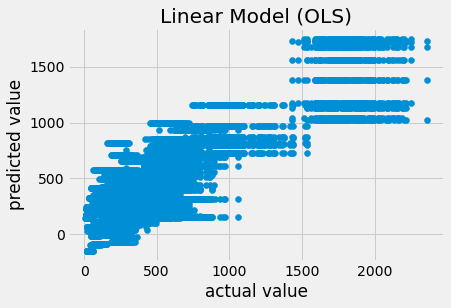

In [10]:
#LINEAR REGRESSION
lin_reg = LinearRegression(normalize=True)
# fit the model
lin_model = lin_reg.fit(X_train, y_train)
lin_pred = lin_model.predict(X_train)
plt.scatter(y_train, lin_pred)
plt.title('Linear Model (OLS)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [11]:
rmse(lin_pred, y_train)

223.57235058778141

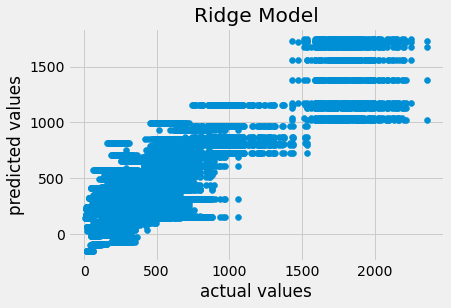

In [12]:
#RIDGE REGRESSION
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_train)
plt.scatter(y_train, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [13]:
rmse(ridge_pred, y_train)

223.57248885975605

/Users/jarellymartin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538400013.5251548, tolerance: 339309.28748883225
  model = cd_fast.enet_coordinate_descent(


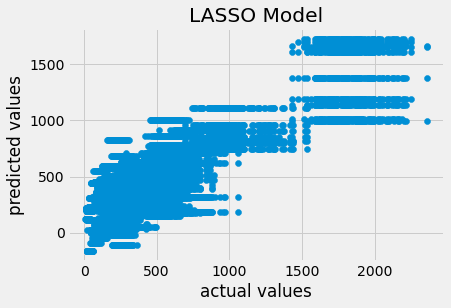

In [14]:
#LASSO REGRESSION
lasso_reg = Lasso(max_iter=10000)  
lasso_model = lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_train)
plt.scatter(y_train, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [15]:
rmse(lasso_pred, y_train)

225.94389745806077

### Validation

In [16]:
lin_vpred = lin_model.predict(X_validate)
ridge_vpred = ridge_model.predict(X_validate)
lasso_vpred = lasso_model.predict(X_validate)

In [17]:
print("linear model rmse: ", rmse(lin_vpred, y_validate))
print("Ridge rmse: ", rmse(ridge_vpred, y_validate))
print("LASSO rmse: ", rmse(lasso_vpred, y_validate))

linear model rmse:  227.94384688044417
Ridge rmse:  227.94325996504327
LASSO rmse:  230.67260810404088


In [18]:
mean = [rmse(lin_vpred, y_validate),rmse(ridge_vpred, y_validate),rmse(lasso_vpred, y_validate)]
np.mean(mean)

228.85323831650945

### Picking a Model

Based on our three models, they all have an rmse that is more less ~224 (will change everytime you run). But, Ridge happens to have the smallest rmse value during validation, so I picked this model in order to predict the number of crimes in our test set. This ouputted a rmse value of about 223, which is close to the rmse during validation.

In [19]:
final_pred = ridge_model.predict(X_test)
# calculate the rmse for the final predictions
print('Test set rmse: ', rmse(final_pred, y_test))

Test set rmse:  226.4611631258619
